In [1]:
# Implementation of Support Vector Machine
# Author: Muhammad Humayun Khan

import numpy as np                  # Linear Algebra
import matplotlib.pyplot as plt     # visualization
from sklearn.model_selection import train_test_split      # training and testing the model
from sklearn.svm import SVC         # Support vector machine algo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix       # evaluation of the algorithm


In [2]:
# dataset with four features and one binary output
# Set the random seed for reproducibility
np.random.seed(42)

# Generate 100 samples
num_samples = 100

# Generate random feature data
X = np.random.randn(num_samples, 4)

# Generate binary labels (0 or 1) based on some arbitrary function of the features
y = (X[:, 0] + X[:, 1] - X[:, 2] + X[:, 3] > 0).astype(int)


In [3]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# train the SVM model
# Create an SVM classifier with an RBF kernel
svm = SVC(kernel='rbf', gamma='scale')

# Train the model on the training data
svm.fit(X_train, y_train)


SVC()

In [5]:
# make predictions
# Predict the labels for the test set
y_pred = svm.predict(X_test)


In [6]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[16  0]
 [ 0 14]]


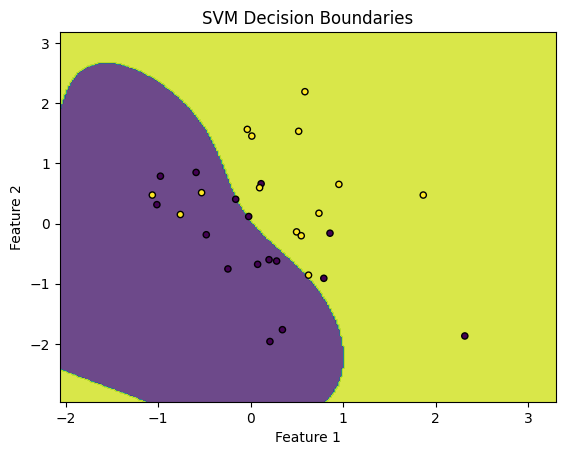

In [7]:
# visualize the result
def plot_decision_boundaries(X, y, model):
    h = 0.02  # step size in the mesh

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contours
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundaries')
    plt.show()

# For visualization, use only the first two features of the dataset
X_vis = X[:, :2]
y_vis = y

# Split the visualization dataset
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

# Train the SVM model on the visualization dataset
svm_vis = SVC(kernel='rbf', gamma='scale')
svm_vis.fit(X_train_vis, y_train_vis)

# Plot the decision boundaries
plot_decision_boundaries(X_test_vis, y_test_vis, svm_vis)
